In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, '../..')

%matplotlib inline
sns.set()

In [103]:
import glob

In [104]:
no_kaf = "../../logs/darnn/ntsa-2019-01-03-11-10-46"
kaf_time = "../../logs/darnn/ntsa-2019-01-03-11-11-06"
kaf_input = "../../logs/darnn/ntsa-2019-01-03-11-11-41"
kaf_dual = "../../logs/darnn/ntsa-2019-01-03-11-12-02"

# no_kaf = "../../logs/darnn/ntsa-2019-01-07-12-39-51-685105"
# kaf_time =  "../../logs/darnn/ntsa-2019-01-07-12-40-12-305552"
# kaf_input = "../../logs/darnn/ntsa-2019-01-07-12-40-47-230658"
# kaf_dual = "../../logs/darnn/ntsa-2019-01-07-12-41-06-713174"


In [105]:
df_no_kaf = pd.read_csv(no_kaf + '/train/results.csv')
df_kaf_time = pd.read_csv(kaf_time + '/train/results.csv')
df_kaf_input = pd.read_csv(kaf_input + '/train/results.csv')
df_kaf_dual = pd.read_csv(kaf_dual + '/train/results.csv')

In [106]:
def smooth(x,w=0.5):
    p = x[0]
    xs = []
    for d in x:
        p = p * w + (1-w) * d
        xs.append(p)
    return np.array(xs)

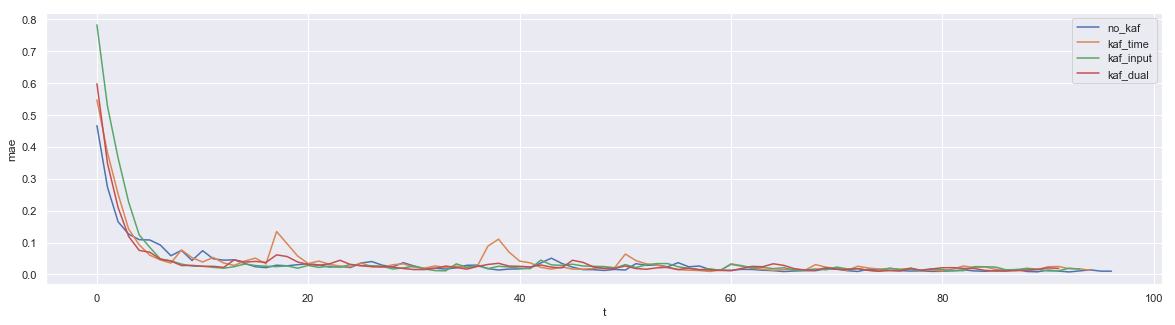

In [107]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.loss.values))
ax.plot(smooth(df_kaf_time.loss.values))
ax.plot(smooth(df_kaf_input.loss.values))
ax.plot(smooth(df_kaf_dual.loss.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

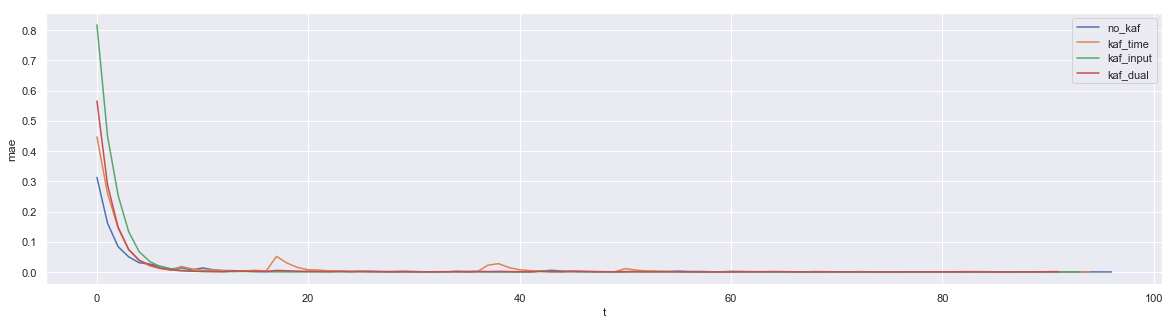

In [108]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.mse.values))
ax.plot(smooth(df_kaf_time.mse.values))
ax.plot(smooth(df_kaf_input.mse.values))
ax.plot(smooth(df_kaf_dual.mse.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

In [109]:
# no reg
rows = ['no_kaf','kaf_time','kaf_input', 'kaf_dual']

table = pd.concat([df_no_kaf.mean(axis=0), df_kaf_time.mean(axis=0), df_kaf_input.mean(axis=0), df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

table.T

,loss,norm,mse,mae,smape,rmse,mape
no_kaf,0.029775,7.250035,0.005239,0.029775,0.054840,0.029775,14.652199
kaf_time,0.037938,6.759447,0.009273,0.037938,0.069371,0.037938,17.061938
kaf_input,0.035318,16.387536,0.011164,0.035318,0.061986,0.035318,16.042718
kaf_dual,0.031463,16.204348,0.007431,0.031463,0.054287,0.031463,12.588384


In [87]:

rows = ['no_kaf','kaf_time','kaf_input', 'kaf_dual']

table = pd.concat([df_no_kaf.mean(axis=0), df_kaf_time.mean(axis=0), df_kaf_input.mean(axis=0), df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

table.T

/Users/d3sm0/.virtualenvs/ntsa/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,loss,mae,mape,mse,norm,reg,rmse,smape
no_kaf,0.051482,0.051482,22.426147,0.016800,6.212457,NaN,0.051482,0.097223
kaf_time,0.031381,0.031228,13.494746,0.011141,5.941838,0.000152,0.031228,0.053796
kaf_input,0.042477,0.033808,18.446673,0.011899,12.393569,0.008669,0.033808,0.064293
kaf_dual,0.054596,0.045687,13.388240,0.042870,13.708266,0.008910,0.045687,0.059755


In [88]:
header = table.index.tolist()

In [89]:
df_no_kaf = pd.read_csv(no_kaf + '/test/results.csv', names=header)
df_kaf_time = pd.read_csv(kaf_time + '/test/results.csv', names=header)
df_kaf_input = pd.read_csv(kaf_input + '/test/results.csv', names=header)
df_kaf_dual = pd.read_csv(kaf_dual+ '/test/results.csv', names=header)

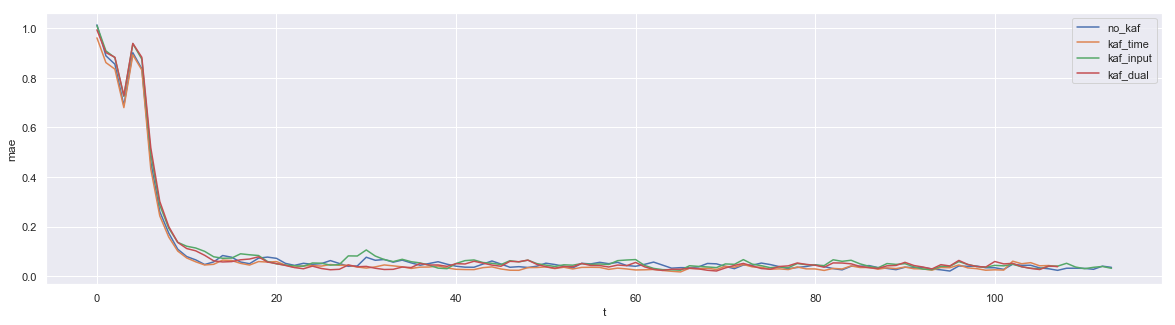

In [90]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(smooth(df_no_kaf.loss.values))
ax.plot(smooth(df_kaf_time.loss.values))
ax.plot(smooth(df_kaf_input.loss.values))
ax.plot(smooth(df_kaf_dual.loss.values))
plt.ylabel('mae')
plt.xlabel('t')
plt.legend(['no_kaf','kaf_time','kaf_input', 'kaf_dual'])

In [110]:
table = pd.concat([df_no_kaf.mean(axis=0), df_kaf_time.mean(axis=0), df_kaf_input.mean(axis=0), df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows

In [111]:
# no reg
table.T

,loss,norm,mse,mae,smape,rmse,mape
no_kaf,0.029775,7.250035,0.005239,0.029775,0.054840,0.029775,14.652199
kaf_time,0.037938,6.759447,0.009273,0.037938,0.069371,0.037938,17.061938
kaf_input,0.035318,16.387536,0.011164,0.035318,0.061986,0.035318,16.042718
kaf_dual,0.031463,16.204348,0.007431,0.031463,0.054287,0.031463,12.588384


In [93]:
table = pd.concat([df_no_kaf.mean(axis=0), df_kaf_time.mean(axis=0), df_kaf_input.mean(axis=0), df_kaf_dual.mean(axis=0)], axis=1)
table.columns = rows
table.T

,loss,mae,mape,mse,norm,reg,rmse,smape
no_kaf,0.087223,6.637310,0.059166,0.087223,0.145643,0.087223,25.847300,NaN
kaf_time,0.080768,0.000236,6.694056,0.060495,0.080531,0.130371,0.080531,19.597754
kaf_input,0.095470,0.010009,11.648026,0.067734,0.085462,0.127740,0.085462,17.388488
kaf_dual,0.092000,0.009905,12.702920,0.067556,0.082094,0.124339,0.082094,16.656699


In [112]:
def last_path(base_path):
    paths = glob.glob(base_path + '/report/*.csv')
    idxs = list(map(lambda x: int(x.split('/')[-1].split('_')[0]), paths))
    idx = max(idxs)
    paths
    return base_path + '/report/' + ''.join([str(idx), '_', 'report.csv'])

In [113]:
df_no_kaf = pd.read_csv(last_path(no_kaf), index_col=0)
df_kaf_time = pd.read_csv(last_path(kaf_time), index_col=0)
df_kaf_input = pd.read_csv(last_path(kaf_input), index_col=0)
df_kaf_dual = pd.read_csv(last_path(kaf_dual), index_col=0)

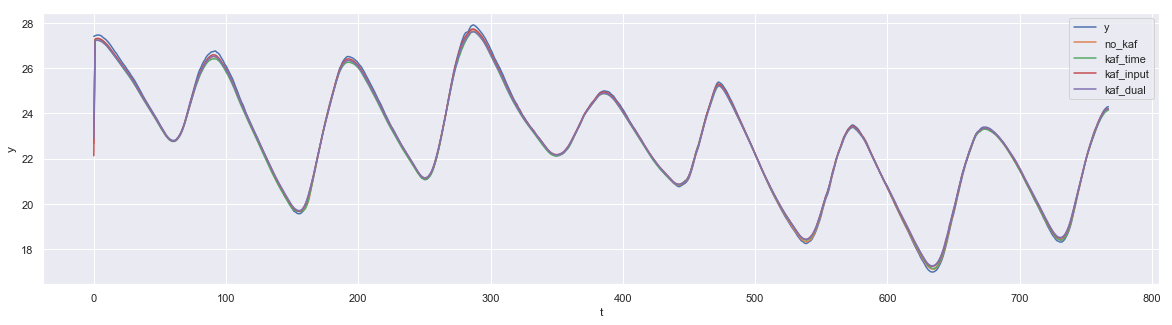

In [114]:
fig,ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(df_no_kaf.y.values)
ax.plot(df_no_kaf.y_hat.values)
ax.plot(df_kaf_time.y_hat.values)
ax.plot(df_kaf_input.y_hat.values)
ax.plot(df_kaf_dual.y_hat.values)
plt.ylabel('y')
plt.xlabel('t')
plt.legend(['y','no_kaf','kaf_time','kaf_input', 'kaf_dual'])

In [115]:
from ntsa.utils.misc import regr_metrics

In [116]:
y = df_no_kaf.y.values
y_no_kaf = df_no_kaf.y_hat.values
y_kaf_time = df_kaf_time.y_hat.values
y_kaf_input = df_kaf_input.y_hat.values
y_kaf_dual = df_kaf_dual.y_hat.values

In [117]:
metrics = [
list(regr_metrics(y, y_no_kaf).values()),
list(regr_metrics(y, y_kaf_time).values()),
list(regr_metrics(y, y_kaf_input).values()),
list(regr_metrics(y, y_kaf_dual).values())
]

In [118]:
# no reg
pd.DataFrame(np.array(metrics), index=['no_kaf', 'time', 'input', 'dual'], columns=['mse', 'mae', 'smape', 'mape'])

,mse,mae,smape,mape
no_kaf,0.037275,0.076716,0.003242,0.327879
time,0.038895,0.114564,0.004863,0.489901
input,0.045603,0.084615,0.003813,0.385022
dual,0.042541,0.110037,0.004873,0.490335


In [101]:
pd.DataFrame(np.array(metrics), index=['no_kaf', 'time', 'input', 'dual'], columns=['mse', 'mae', 'smape', 'mape'])

,mse,mae,smape,mape
no_kaf,0.019546,0.090421,0.004081,0.409017
time,0.051889,0.128957,0.005507,0.555267
input,0.083574,0.087813,0.003877,0.395991
dual,0.066618,0.088177,0.003919,0.397359
